In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [33]:
def image_info(img):
    shape = img.shape
    print(f'Height: {shape[0]}')
    print(f'Width: {shape[1]}')
    print(f'Channels: {shape[2]}')
    print(f'Dtype: {img.dtype}')
    print(f'{img.min() = }, {img.max() = }')

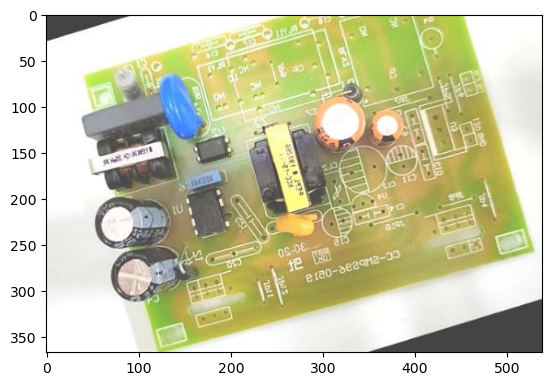

In [34]:
img = cv.imread(r'PCB5.jpg')
plt.imshow(img[:, :, ::-1]);

In [35]:
image_info(img)

Height: 367
Width: 539
Channels: 3
Dtype: uint8
img.min() = 5, img.max() = 255


In [36]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

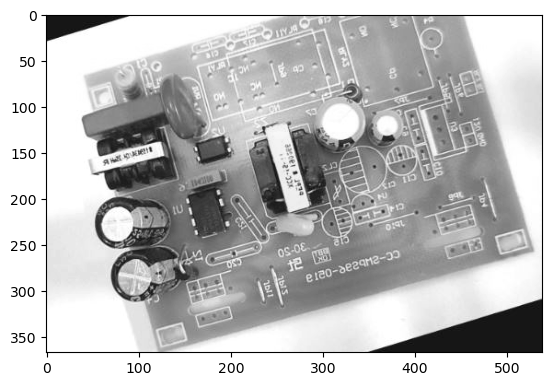

In [37]:
plt.imshow(img_gray, cmap='gray');

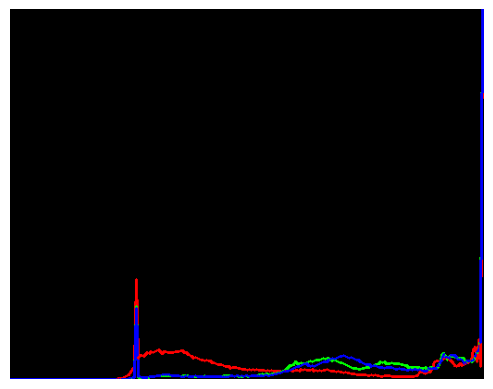

In [42]:
bgr_planes = cv.split(img)
histSize = 256
histRange = (0, 256)
accumulate = False
b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))
histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)
    
plt.imshow(histImage);
plt.axis(False);

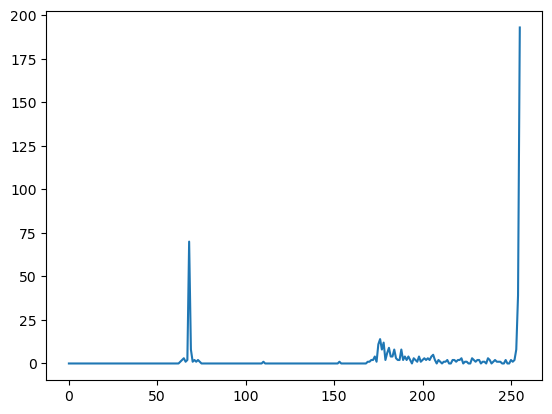

In [46]:
plt.plot(cv.calcHist(img_gray, [0], None, [histSize], histRange, accumulate=accumulate));

In [64]:
img_t = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

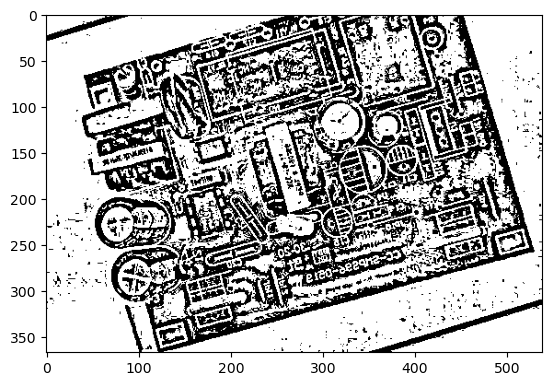

In [65]:
plt.imshow(img_t, cmap='gray')